In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm

SMALL_SIZE = 14
MEDIUM_SIZE = 16
LARGE_SIZE = 18
HUGE_SIZE = 20

plt.rcdefaults()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = MEDIUM_SIZE
plt.rcParams['axes.titlesize'] = LARGE_SIZE
plt.rcParams['axes.labelsize'] = MEDIUM_SIZE
plt.rcParams['xtick.labelsize'] = MEDIUM_SIZE
plt.rcParams['ytick.labelsize'] = MEDIUM_SIZE
plt.rcParams['legend.fontsize'] = MEDIUM_SIZE
plt.rcParams['figure.titlesize'] = LARGE_SIZE
plt.rcParams['figure.figsize'] = [7.2, 7.2]
plt.rcParams['figure.dpi'] = 60
plt.rcParams['figure.facecolor'] = (1.0, 1.0, 1.0, 0.0)

from utils import SREQ, LREQ, CobbDouglasConsumer

# Scenario A: Monetary transfer preferable to in-kind

In [2]:
# Equations setup

a = 0.25
b = 0.75
I = 60
px = 1
py = 1
v = 40

xgridA = np.arange(0,100,1)
xgridB = np.arange(v,100,1)
xgridC = np.arange(0,v,1)
xticks = np.arange(0,101,10)
yticks = np.arange(0,101,10)
xlim = [0,100]
ylim = [0,100]

cb1 = CobbDouglasConsumer(a=a, b=b, I=I, px=px, py=py)
cb2 = CobbDouglasConsumer(a=a, b=b, I=I+v, px=px, py=py)

UA = cb1.U
UB = v**a * (I/py)**b
UC = cb2.U

print(UA, UB, UC)

Ugrid = [20, 25, 30, UA, 40, 45, 50, UB, UC, 65, 70, 75]

34.19260585432166 54.216120216590696 56.987676423869445


/var/folders/gq/q9pyhht15359vjqxf7r5q9_40000gn/T/ipykernel_48576/4150298831.py:6: RuntimeWarning: divide by zero encountered in divide
  ax.plot(xgridA, (u/xgridA**a)**(1/b), color='green', alpha=0.2)


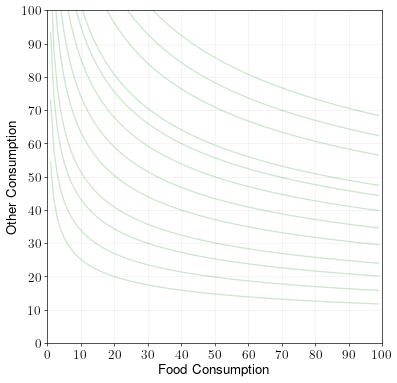

In [3]:
# Graphical setup

fig, ax = plt.subplots()

for u in Ugrid:
    ax.plot(xgridA, (u/xgridA**a)**(1/b), color='green', alpha=0.2)

ax.set_ylabel('Other Consumption')
ax.set_xlabel('Food Consumption')
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_axisbelow(True)
plt.grid(alpha=0.2)
#plt.title('Scenario B: Money transfer is better')
plt.savefig('../assets/images/13-inkind-vs-monetary-food-stamps-A-setup.png', bbox_inches='tight')
plt.show()

/var/folders/gq/q9pyhht15359vjqxf7r5q9_40000gn/T/ipykernel_48576/841546756.py:12: RuntimeWarning: divide by zero encountered in divide
  ax.plot(xgridA, (u/xgridA**a)**(1/b), color='green', alpha=0.2)


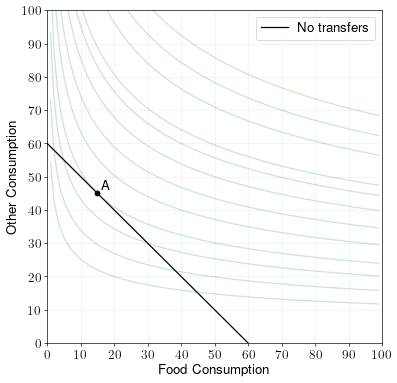

In [4]:
# No transfers

fig, ax = plt.subplots()

ax.plot(xgridA, (I-px*xgridA)/py, color='black')
plt.legend(['No transfers'])

ax.plot(cb1.x, cb1.y, 'o', color='black')
ax.text(cb1.x+1, cb1.y+1, 'A', color='black')

for u in Ugrid:
    ax.plot(xgridA, (u/xgridA**a)**(1/b), color='green', alpha=0.2)

ax.set_ylabel('Other Consumption')
ax.set_xlabel('Food Consumption')
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_axisbelow(True)
plt.grid(alpha=0.2)
#plt.title('Scenario B: Money transfer is better')
plt.savefig('../assets/images/13-inkind-vs-monetary-food-stamps-A-baseline.png', bbox_inches='tight')
plt.show()

/var/folders/gq/q9pyhht15359vjqxf7r5q9_40000gn/T/ipykernel_48576/2325876523.py:17: RuntimeWarning: divide by zero encountered in divide
  ax.plot(xgridA, (u/xgridA**a)**(1/b), color='green', alpha=0.2)


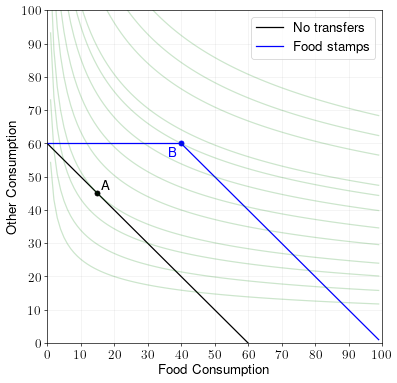

In [5]:
# Food stamps

fig, ax = plt.subplots()

ax.plot(xgridA, (I-px*xgridA)/py, color='black')
ax.plot(xgridB, (I+v-px*xgridB)/py, color='blue')
ax.plot(xgridC, [I/py]*len(xgridC), color='blue')
plt.legend(['No transfers', 'Food stamps'])

ax.plot(cb1.x, cb1.y, 'o', color='black')
ax.text(cb1.x+1, cb1.y+1, 'A', color='black')

ax.plot(v, I/py, 'o', color='blue')
ax.text(v-1, I/py-1, 'B', color='blue', horizontalalignment='right', verticalalignment='top')

for u in Ugrid:
    ax.plot(xgridA, (u/xgridA**a)**(1/b), color='green', alpha=0.2)

ax.set_ylabel('Other Consumption')
ax.set_xlabel('Food Consumption')
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_axisbelow(True)
plt.grid(alpha=0.2)
#plt.title('Scenario B: Money transfer is better')
plt.savefig('../assets/images/13-inkind-vs-monetary-food-stamps-A-in-kind.png', bbox_inches='tight')
plt.show()

/var/folders/gq/q9pyhht15359vjqxf7r5q9_40000gn/T/ipykernel_48576/2558992330.py:21: RuntimeWarning: divide by zero encountered in divide
  ax.plot(xgridA, (u/xgridA**a)**(1/b), color='green', alpha=0.2)


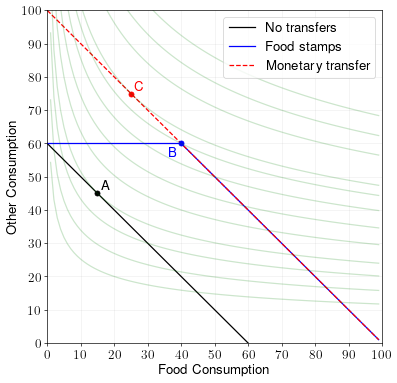

In [6]:
# Monetary transfers

fig, ax = plt.subplots()

ax.plot(xgridA, (I-px*xgridA)/py, color='black')
ax.plot(xgridB, (I+v-px*xgridB)/py, color='blue')
ax.plot(xgridA, (I+v-px*xgridA)/py, color='red', linestyle='dashed')
ax.plot(xgridC, [I/py]*len(xgridC), color='blue')
plt.legend(['No transfers', 'Food stamps', 'Monetary transfer'])

ax.plot(cb1.x, cb1.y, 'o', color='black')
ax.text(cb1.x+1, cb1.y+1, 'A', color='black')

ax.plot(v, I/py, 'o', color='blue')
ax.text(v-1, I/py-1, 'B', color='blue', horizontalalignment='right', verticalalignment='top')

ax.plot(cb2.x, cb2.y, 'o', color='red')
ax.text(cb2.x+1, cb2.y+1, 'C', color='red')

for u in Ugrid:
    ax.plot(xgridA, (u/xgridA**a)**(1/b), color='green', alpha=0.2)

ax.set_ylabel('Other Consumption')
ax.set_xlabel('Food Consumption')
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_axisbelow(True)
plt.grid(alpha=0.2)
#plt.title('Scenario B: Money transfer is better')
plt.savefig('../assets/images/13-inkind-vs-monetary-food-stamps-A-monetary.png', bbox_inches='tight')
plt.show()

# Scenario B: Monetary transfer equivalent to in-kind

In [7]:
# Equations setup

a = 0.6
b = 0.4
I = 60
px = 1
py = 1
v = 40

xgridA = np.arange(0,100,1)
xgridB = np.arange(v,100,1)
xgridC = np.arange(0,v,1)
xticks = np.arange(0,101,10)
yticks = np.arange(0,101,10)
xlim = [0,100]
ylim = [0,100]

cb1 = CobbDouglasConsumer(a=a, b=b, I=I, px=px, py=py)
cb2 = CobbDouglasConsumer(a=a, b=b, I=I+v, px=px, py=py)

UA = cb1.U
UB = v**a * (I/py)**b
UC = cb2.U

print(UA, UB, UC)

Ugrid = [20, 25, UA, 40, UB, UC, 55, 60, 65, 70, 75]

30.61018801501898 47.04316090098694 51.01698002503163


/var/folders/gq/q9pyhht15359vjqxf7r5q9_40000gn/T/ipykernel_48576/2532583464.py:6: RuntimeWarning: divide by zero encountered in divide
  ax.plot(xgridA, (u/xgridA**a)**(1/b), color='green', alpha=0.2)


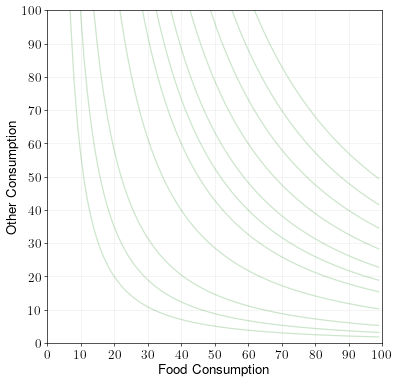

In [8]:
# Graphical setup

fig, ax = plt.subplots()

for u in Ugrid:
    ax.plot(xgridA, (u/xgridA**a)**(1/b), color='green', alpha=0.2)

ax.set_ylabel('Other Consumption')
ax.set_xlabel('Food Consumption')
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_axisbelow(True)
plt.grid(alpha=0.2)
#plt.title('Scenario B: Money transfer is better')
plt.savefig('../assets/images/13-inkind-vs-monetary-food-stamps-B-setup.png', bbox_inches='tight')
plt.show()

/var/folders/gq/q9pyhht15359vjqxf7r5q9_40000gn/T/ipykernel_48576/3707861888.py:21: RuntimeWarning: divide by zero encountered in divide
  ax.plot(xgridA, (u/xgridA**a)**(1/b), color='green', alpha=0.2)


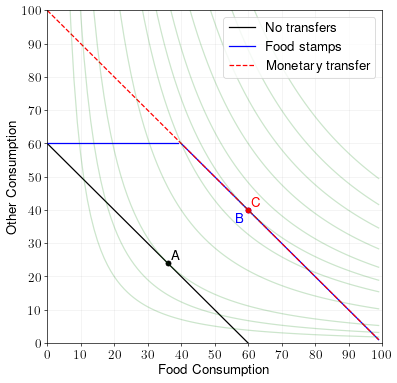

In [9]:
# Monetary transfers

fig, ax = plt.subplots()

ax.plot(xgridA, (I-px*xgridA)/py, color='black')
ax.plot(xgridB, (I+v-px*xgridB)/py, color='blue')
ax.plot(xgridA, (I+v-px*xgridA)/py, color='red', linestyle='dashed')
ax.plot(xgridC, [I/py]*len(xgridC), color='blue')
plt.legend(['No transfers', 'Food stamps', 'Monetary transfer'])

ax.plot(cb1.x, cb1.y, 'o', color='black')
ax.text(cb1.x+1, cb1.y+1, 'A', color='black')

ax.plot(cb2.x, cb2.y, 'o', color='blue')
ax.text(cb2.x-1, cb2.y-1, 'B', color='blue', horizontalalignment='right', verticalalignment='top')

ax.plot(cb2.x, cb2.y, 'o', color='red')
ax.text(cb2.x+1, cb2.y+1, 'C', color='red')

for u in Ugrid:
    ax.plot(xgridA, (u/xgridA**a)**(1/b), color='green', alpha=0.2)

ax.set_ylabel('Other Consumption')
ax.set_xlabel('Food Consumption')
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_axisbelow(True)
plt.grid(alpha=0.2)
#plt.title('Scenario B: Money transfer is better')
plt.savefig('../assets/images/13-inkind-vs-monetary-food-stamps-B-monetary.png', bbox_inches='tight')
plt.show()